In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

c:\Users\Guest 1\Desktop\ttl-agentic-ai\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("forecasting_ready_1.csv")
df["Date"] = pd.to_datetime(df["Date"])

In [3]:
sku = df["SKU_ID"].unique()[0]
sku_df = df[df["SKU_ID"] == sku][["Date", "Units_Sold"]]

In [4]:
sku_df = sku_df.rename(columns={
    "Date": "ds",
    "Units_Sold": "y"
})

In [5]:
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True
)

In [6]:
model.fit(sku_df)

10:13:35 - cmdstanpy - INFO - Chain [1] start processing
10:13:35 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

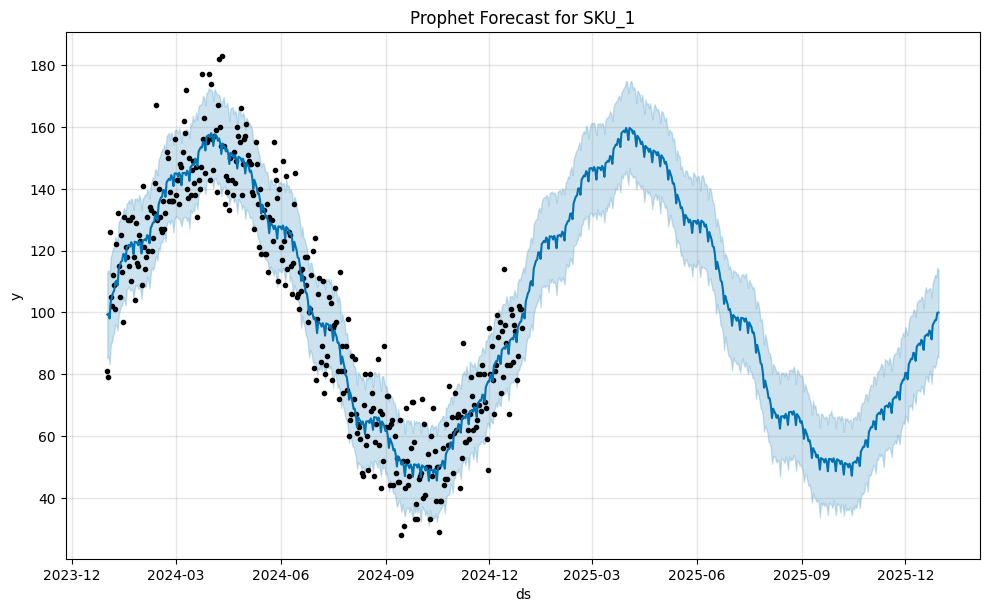

In [14]:

model.plot(forecast)
plt.title(f"Prophet Forecast for {sku}")
plt.show()

In [15]:
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10))

            ds       yhat  yhat_lower  yhat_upper
720 2025-12-21  92.418658   77.498333  107.182709
721 2025-12-22  94.131231   81.001301  107.679184
722 2025-12-23  93.664231   80.248282  107.754676
723 2025-12-24  91.257881   76.938043  104.760019
724 2025-12-25  95.930751   82.375718  109.429974
725 2025-12-26  96.613470   82.646899  110.668703
726 2025-12-27  97.445981   82.029216  112.163553
727 2025-12-28  97.508158   83.422170  111.395776
728 2025-12-29  99.795868   85.952327  114.411186
729 2025-12-30  99.938603   85.478468  113.677037


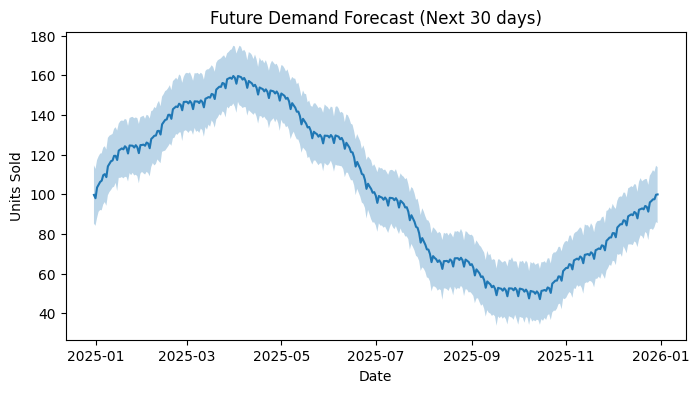

In [16]:
forecast_only = forecast[forecast["ds"] > sku_df["ds"].max()]

plt.figure(figsize=(8,4))
plt.plot(forecast_only["ds"], forecast_only["yhat"])
plt.fill_between(
    forecast_only["ds"],
    forecast_only["yhat_lower"],
    forecast_only["yhat_upper"],
    alpha=0.3
)
plt.title("Future Demand Forecast (Next 30 days)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()
